<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-5/blob/main/Homework_5_Problem_3_(11_features).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5- Problem-3 (11 features)
#Ahmed Elshazly
#801420724


In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [2]:
def linear_model(x, w, b):
    return x @ w + b

In [3]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [4]:
def train (n_epochs, model, optimizer, parameters, x_train, y_train, x_val, y_val):
  train_rmse_list = []
  val_rmse_list = []
  for epoch in range(n_epochs+1):
    train_x_p=model(x_train,*parameters)
    train_loss=loss_fn(train_x_p,y_train)

    with torch.no_grad():
      val_x_p=model(x_val,*parameters)
      val_loss=loss_fn(val_x_p,y_val)
      assert val_loss.requires_grad==False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_rmse = torch.sqrt(train_loss).detach().item()
    train_rmse_list.append(train_rmse)
    val_rmse = torch.sqrt(val_loss).detach().item()
    val_rmse_list.append(val_rmse)

    if epoch % 500==0:
      print(f"Epoch {epoch}, Training RMSE {train_rmse:.4f}, Validation RMSE {val_rmse:.4f}")

  return parameters,train_rmse_list, val_rmse_list

In [5]:
file_path = url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
furnishingstatus=housing.pop('furnishingstatus')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [7]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [8]:
stander=StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing[num_vars] = stander.fit_transform(housing[num_vars])
Y=housing.pop("price")
X=housing
Y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [9]:
X = torch.tensor(X.values)
Y = torch.tensor(Y.values)
n_samples=X.shape[0]
n_val=int(0.2*n_samples)
shuffled_indices=torch.randperm(n_samples)

train_indices=shuffled_indices[ : -n_val]
val_indices=shuffled_indices[-n_val :]

train_X=X[train_indices]
train_Y=Y[train_indices]

val_X=X[val_indices]
val_Y=Y[val_indices]

train_X = train_X.float()
val_X = val_X.float()
train_Y = train_Y.float()
val_Y = val_Y.float()


Training with learning rate: 0.01
Epoch 0, Training RMSE 5125372.5000, Validation RMSE 5098161.5000
Epoch 500, Training RMSE 1132560.8750, Validation RMSE 1045654.8750
Final parameters with learning rate 0.01: [tensor([ 449169.7188,  122544.5781,  506818.2188,  360286.6562, 1301745.8750,
         375755.8750,  490964.1875,  377592.3438, 1000534.6875,  205942.6719,
         644075.3125], requires_grad=True), tensor(2858867.2500, requires_grad=True)]


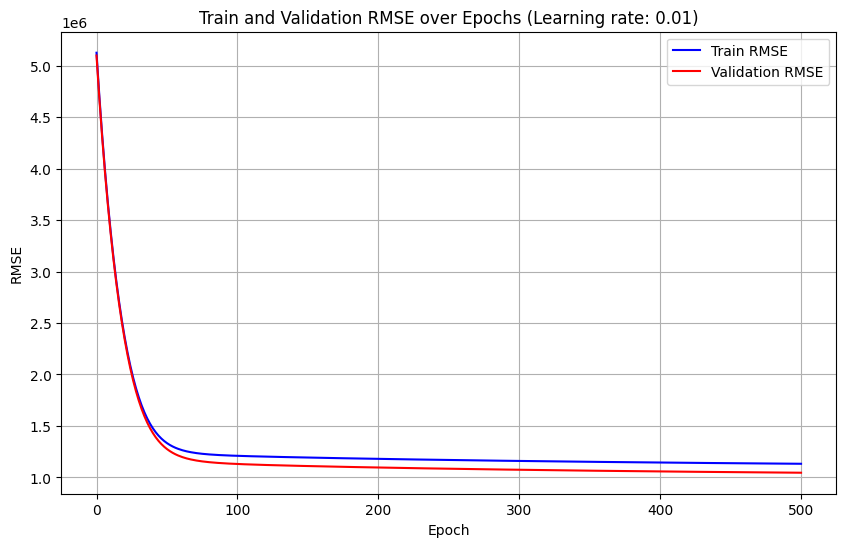

In [10]:
learning_rates = [0.01]
number_of_epochs=500
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  w = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
  b = torch.tensor(0.0, requires_grad=True)
  optimizer=optim.SGD([w, b], lr=learning_rate)
  trained_parameters, train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=[w,b],
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()


Training with learning rate: 0.1
Epoch 0, Training RMSE 5125372.5000, Validation RMSE 5098161.5000
Epoch 500, Training RMSE 1087705.8750, Validation RMSE 1000437.7500
Epoch 1000, Training RMSE 1087701.5000, Validation RMSE 1000484.8125
Epoch 1500, Training RMSE 1087701.5000, Validation RMSE 1000486.2500
Epoch 2000, Training RMSE 1087701.3750, Validation RMSE 1000486.1875
Epoch 2500, Training RMSE 1087701.3750, Validation RMSE 1000486.1875
Epoch 3000, Training RMSE 1087701.3750, Validation RMSE 1000486.1875
Epoch 3500, Training RMSE 1087701.3750, Validation RMSE 1000486.1875
Epoch 4000, Training RMSE 1087701.3750, Validation RMSE 1000486.1875
Epoch 4500, Training RMSE 1087701.3750, Validation RMSE 1000486.1875
Epoch 5000, Training RMSE 1087701.3750, Validation RMSE 1000486.1875
Final parameters with learning rate 0.1: [tensor([548971.1250,  82171.8828, 495984.2500, 398482.6562, 441218.5938,
        380491.2188, 376057.5938, 920512.0000, 965572.5000, 244462.2031,
        765093.4375], r

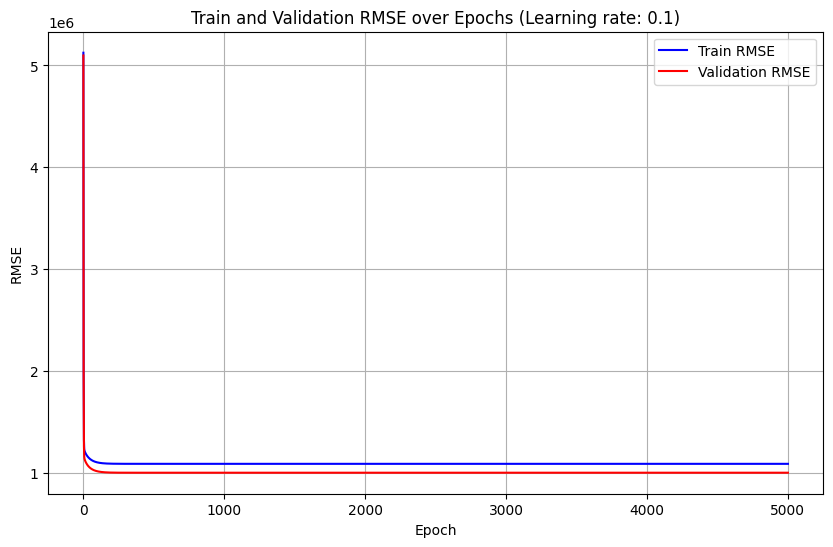


Training with learning rate: 0.01
Epoch 0, Training RMSE 5125372.5000, Validation RMSE 5098161.5000
Epoch 500, Training RMSE 1132560.8750, Validation RMSE 1045654.8750
Epoch 1000, Training RMSE 1101643.8750, Validation RMSE 1014458.6250
Epoch 1500, Training RMSE 1092097.7500, Validation RMSE 1004871.5625
Epoch 2000, Training RMSE 1089121.0000, Validation RMSE 1001812.6250
Epoch 2500, Training RMSE 1088176.6250, Validation RMSE 1000828.2500
Epoch 3000, Training RMSE 1087868.3750, Validation RMSE 1000518.7500
Epoch 3500, Training RMSE 1087763.3750, Validation RMSE 1000431.6250
Epoch 4000, Training RMSE 1087726.0000, Validation RMSE 1000417.2500
Epoch 4500, Training RMSE 1087711.6250, Validation RMSE 1000425.1875
Epoch 5000, Training RMSE 1087706.0000, Validation RMSE 1000437.7500
Final parameters with learning rate 0.01: [tensor([548419.1250,  82488.2031, 496193.9375, 398453.6250, 444047.1562,
        380618.8438, 376328.3125, 904949.5625, 964834.0000, 244516.1094,
        764439.6875],

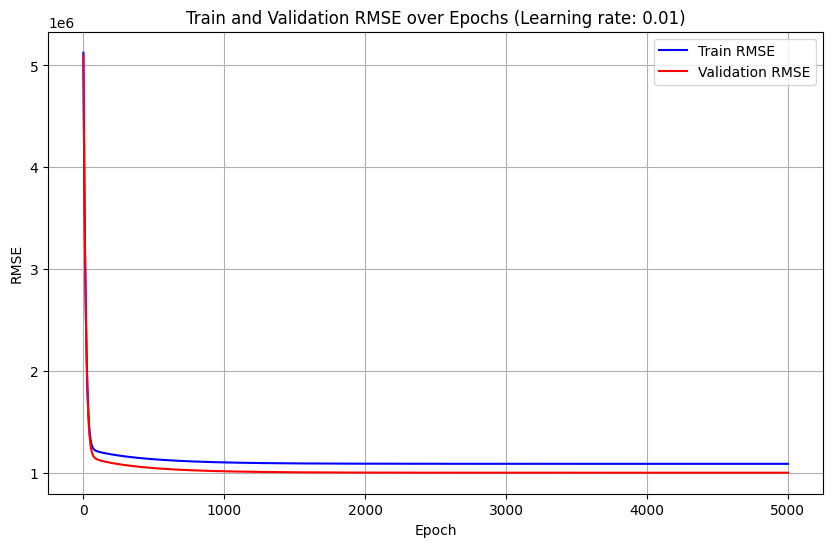


Training with learning rate: 0.001
Epoch 0, Training RMSE 5125372.5000, Validation RMSE 5098161.5000
Epoch 500, Training RMSE 1342804.3750, Validation RMSE 1286204.0000
Epoch 1000, Training RMSE 1210084.3750, Validation RMSE 1131034.8750
Epoch 1500, Training RMSE 1193049.3750, Validation RMSE 1110450.0000
Epoch 2000, Training RMSE 1180266.8750, Validation RMSE 1096269.0000
Epoch 2500, Training RMSE 1169408.0000, Validation RMSE 1084474.2500
Epoch 3000, Training RMSE 1160007.8750, Validation RMSE 1074389.7500
Epoch 3500, Training RMSE 1151795.0000, Validation RMSE 1065678.7500
Epoch 4000, Training RMSE 1144579.2500, Validation RMSE 1058105.8750
Epoch 4500, Training RMSE 1138216.2500, Validation RMSE 1051490.8750
Epoch 5000, Training RMSE 1132590.8750, Validation RMSE 1045691.1875
Final parameters with learning rate 0.001: [tensor([ 449024.9688,  122576.4219,  506797.1562,  360301.4062, 1302940.2500,
         375850.5000,  491397.9375,  377071.3750, 1000451.3125,  205896.3281,
         

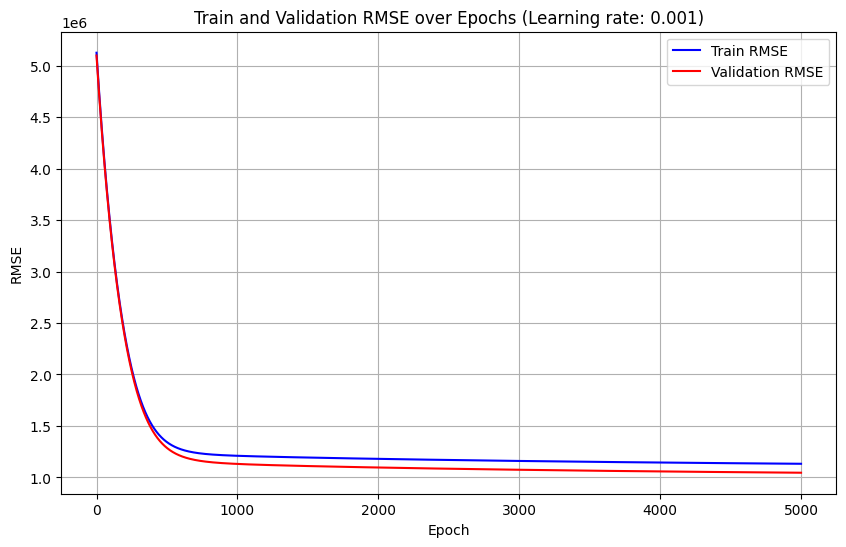


Training with learning rate: 0.0001
Epoch 0, Training RMSE 5125372.5000, Validation RMSE 5098161.5000
Epoch 500, Training RMSE 4172955.2500, Validation RMSE 4151009.2500
Epoch 1000, Training RMSE 3425030.5000, Validation RMSE 3405573.5000
Epoch 1500, Training RMSE 2843022.2500, Validation RMSE 2823508.7500
Epoch 2000, Training RMSE 2395742.7500, Validation RMSE 2373893.7500
Epoch 2500, Training RMSE 2057525.2500, Validation RMSE 2031433.2500
Epoch 3000, Training RMSE 1806729.7500, Validation RMSE 1774997.6250
Epoch 3500, Training RMSE 1624743.5000, Validation RMSE 1586592.3750
Epoch 4000, Training RMSE 1495521.6250, Validation RMSE 1450796.6250
Epoch 4500, Training RMSE 1405521.2500, Validation RMSE 1354575.5000
Epoch 5000, Training RMSE 1343770.1250, Validation RMSE 1287276.2500
Final parameters with learning rate 0.0001: [tensor([ 360360.4375,  202271.3594,  402918.7812,  321335.3750, 1673709.6250,
         410681.4688,  699120.6875,  106128.1328,  829195.3750,  173203.8438,
       

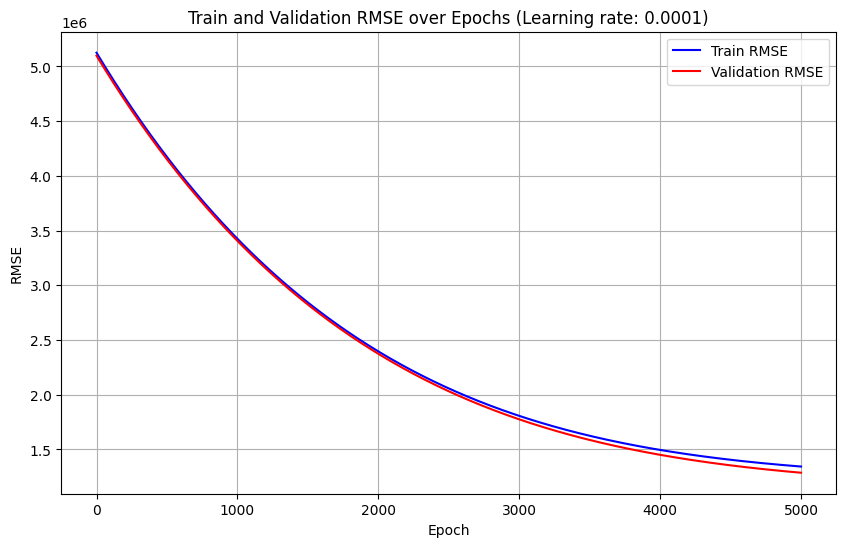

In [11]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
number_of_epochs=5000
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  w = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
  b = torch.tensor(0.0, requires_grad=True)
  optimizer=optim.SGD([w, b], lr=learning_rate)
  trained_parameters, train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=[w,b],
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()


Training with learning rate: 0.01
Epoch 0, Training RMSE 5125372.5000, Validation RMSE 5098161.5000
Epoch 500, Training RMSE 1132587.5000, Validation RMSE 1045689.0625
Final parameters with learning rate 0.01: [tensor([ 449133.2188,  122558.0938,  506799.6875,  360276.5312, 1301953.2500,
         375766.3125,  491035.9688,  377476.0625, 1000498.8750,  205929.0625,
         644041.6250], requires_grad=True), tensor(2858561., requires_grad=True)]


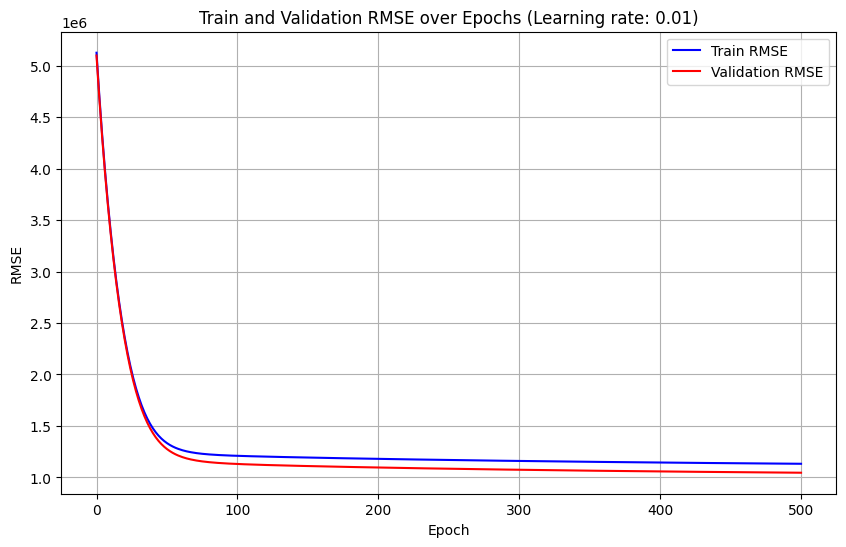

In [12]:
#ASGD Optimizer
learning_rates = [0.01]
number_of_epochs=500
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  w = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
  b = torch.tensor(0.0, requires_grad=True)
  optimizer=optim.ASGD([w, b], lr=learning_rate)
  trained_parameters, train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=[w,b],
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()


Training with learning rate: 0.1
Epoch 0, Training RMSE 5125372.5000, Validation RMSE 5098161.5000
Epoch 500, Training RMSE 1087706.8750, Validation RMSE 1000441.9375
Epoch 1000, Training RMSE 1087701.6250, Validation RMSE 1000487.3125
Epoch 1500, Training RMSE 1087701.5000, Validation RMSE 1000488.8125
Epoch 2000, Training RMSE 1087701.5000, Validation RMSE 1000488.9375
Epoch 2500, Training RMSE 1087701.5000, Validation RMSE 1000488.9375
Epoch 3000, Training RMSE 1087701.5000, Validation RMSE 1000488.9375
Epoch 3500, Training RMSE 1087701.5000, Validation RMSE 1000488.8750
Epoch 4000, Training RMSE 1087701.6250, Validation RMSE 1000489.1250
Epoch 4500, Training RMSE 1087701.6250, Validation RMSE 1000489.1250
Epoch 5000, Training RMSE 1087701.5000, Validation RMSE 1000489.1250
Final parameters with learning rate 0.1: [tensor([548811.0625,  82241.1797, 495984.3750, 398418.3750, 442466.4062,
        380489.1250, 376229.6875, 919515.4375, 965587.7500, 244403.4844,
        764904.9375], r

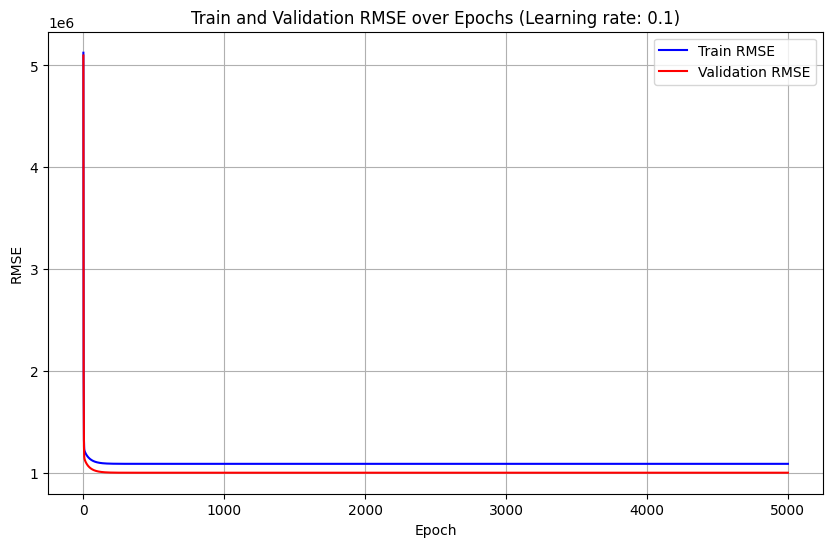


Training with learning rate: 0.01
Epoch 0, Training RMSE 5125372.5000, Validation RMSE 5098161.5000
Epoch 500, Training RMSE 1132587.5000, Validation RMSE 1045689.0625
Epoch 1000, Training RMSE 1101681.7500, Validation RMSE 1014503.7500
Epoch 1500, Training RMSE 1092129.1250, Validation RMSE 1004909.8125
Epoch 2000, Training RMSE 1089142.1250, Validation RMSE 1001839.3125
Epoch 2500, Training RMSE 1088189.6250, Validation RMSE 1000846.3750
Epoch 3000, Training RMSE 1087876.2500, Validation RMSE 1000532.8125
Epoch 3500, Training RMSE 1087768.2500, Validation RMSE 1000441.8750
Epoch 4000, Training RMSE 1087728.8750, Validation RMSE 1000425.0625
Epoch 4500, Training RMSE 1087713.3750, Validation RMSE 1000431.5625
Epoch 5000, Training RMSE 1087707.0000, Validation RMSE 1000443.1250
Final parameters with learning rate 0.01: [tensor([548250.6875,  82559.9688, 496194.7188, 398386.5000, 445353.3438,
        380622.2812, 376505.2812, 903922.7500, 964848.2500, 244454.8750,
        764253.1250],

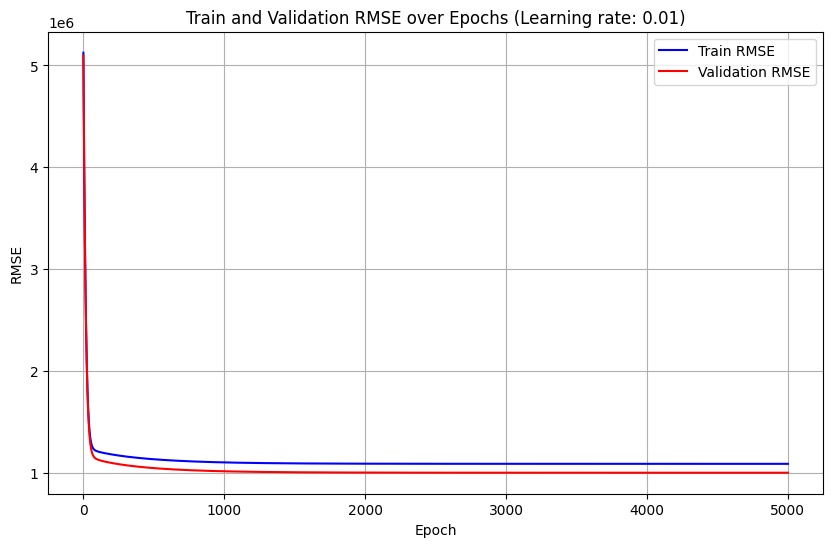


Training with learning rate: 0.001
Epoch 0, Training RMSE 5125372.5000, Validation RMSE 5098161.5000
Epoch 500, Training RMSE 1342850.6250, Validation RMSE 1286255.1250
Epoch 1000, Training RMSE 1210094.3750, Validation RMSE 1131051.6250
Epoch 1500, Training RMSE 1193054.0000, Validation RMSE 1110461.7500
Epoch 2000, Training RMSE 1180271.7500, Validation RMSE 1096281.6250
Epoch 2500, Training RMSE 1169413.8750, Validation RMSE 1084487.7500
Epoch 3000, Training RMSE 1160016.6250, Validation RMSE 1074404.3750
Epoch 3500, Training RMSE 1151807.7500, Validation RMSE 1065696.3750
Epoch 4000, Training RMSE 1144595.3750, Validation RMSE 1058125.8750
Epoch 4500, Training RMSE 1138235.3750, Validation RMSE 1051513.3750
Epoch 5000, Training RMSE 1132612.3750, Validation RMSE 1045715.2500
Final parameters with learning rate 0.001: [tensor([ 448987.1562,  122587.8828,  506772.6250,  360306.1250, 1303103.0000,
         375854.6875,  491464.6875,  376948.9062, 1000360.7500,  205885.9688,
         

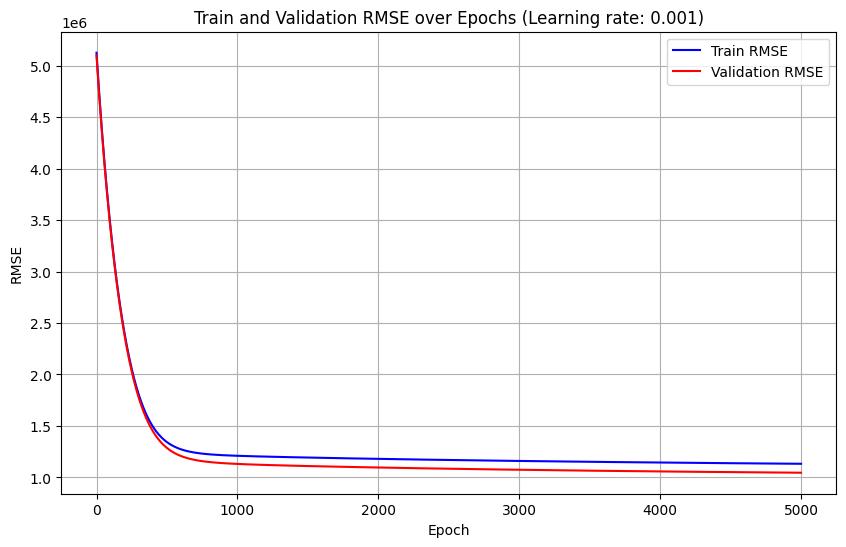


Training with learning rate: 0.0001
Epoch 0, Training RMSE 5125372.5000, Validation RMSE 5098161.5000
Epoch 500, Training RMSE 4172956.7500, Validation RMSE 4151010.5000
Epoch 1000, Training RMSE 3425035.0000, Validation RMSE 3405578.0000
Epoch 1500, Training RMSE 2843030.7500, Validation RMSE 2823517.2500
Epoch 2000, Training RMSE 2395754.7500, Validation RMSE 2373906.0000
Epoch 2500, Training RMSE 2057540.0000, Validation RMSE 2031448.3750
Epoch 3000, Training RMSE 1806744.7500, Validation RMSE 1775012.8750
Epoch 3500, Training RMSE 1624757.8750, Validation RMSE 1586607.2500
Epoch 4000, Training RMSE 1495534.5000, Validation RMSE 1450810.3750
Epoch 4500, Training RMSE 1405532.3750, Validation RMSE 1354587.5000
Epoch 5000, Training RMSE 1343779.6250, Validation RMSE 1287286.6250
Final parameters with learning rate 0.0001: [tensor([ 360358.8125,  202271.4219,  402916.5000,  321333.8125, 1673702.2500,
         410679.8438,  699118.8750,  106127.1250,  829190.9375,  173203.1719,
       

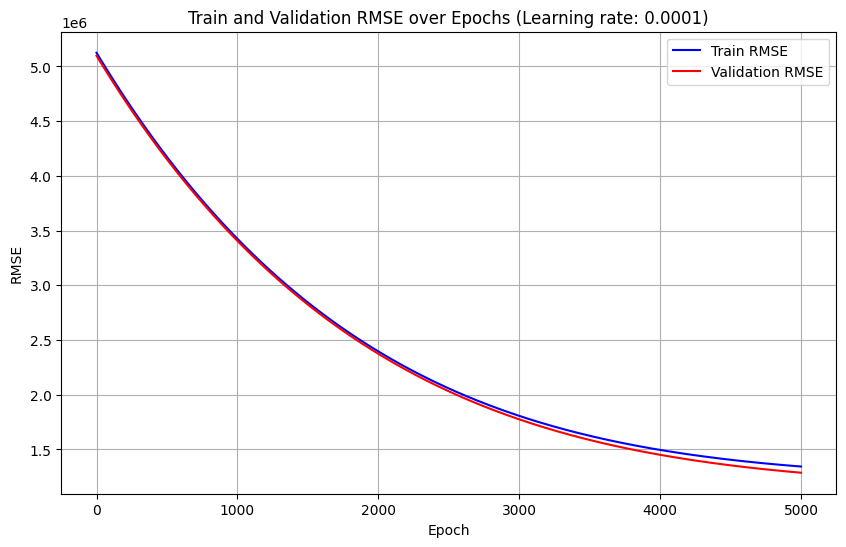

In [13]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
number_of_epochs=5000
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  w = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
  b = torch.tensor(0.0, requires_grad=True)
  optimizer=optim.ASGD([w, b], lr=learning_rate)
  trained_parameters, train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=[w,b],
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()